데이터의 구조
- 1차원 데이터 : =vector 
    - scaler : 크기만 갖는 값 (흡사 질량)
    - vector : 크기와 방향을 갖는 값 (흡사 무게)
- 2차원 데이터 : 배열 (array)
- 다차원 데이터: tensor

#### 다차원 배열 연산

In [2]:
# 행렬의 곱
import numpy as np

a = np.array([[1,2], [3,4]])
b = np.array([[5,6], [7,8]])

print(np.dot(a, b))

[[19 22]
 [43 50]]


#### 활성화 함수 
    - 계단함수, sigmoid, tanh, Relu, softmax
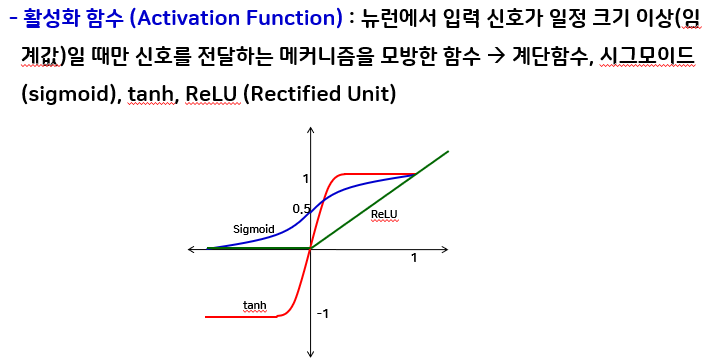

##### 계단함수 : 0보다 작으면 0이고, 크면 1인 함수
    - 미분하면 0이 되므로 활성화 함수로 쓸 수 없다

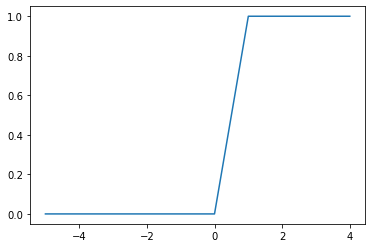

In [4]:
import matplotlib.pyplot as plt

def step_function(x):
    return np.array(x > 0, dtype=np.int)  #0보다클때만1로 반환

x = np.arange(-5.0, 5.0, 1.0)  ## x축 값 -5.0~5.0로 설정
y = step_function(x)

plt.plot(x, y)

##### sigmoid 함수
    - 0과 1사이의 값을 갖는 함수
    - 미분을 하면 최대값이 0.28이므로 활성화 함수로 쓰면 기울기 소실 문제가 발생
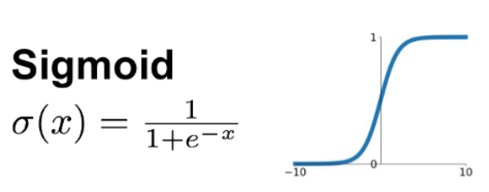

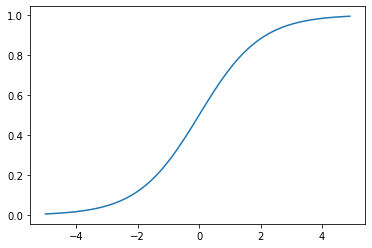

In [6]:
def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid_function(x)

plt.plot(x,y)

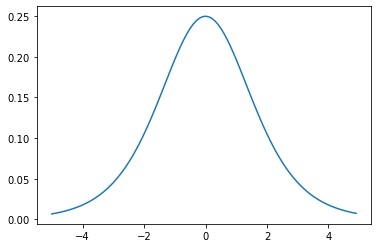

In [12]:
# sigmoid 함수를 미분
def derivative_sigmoid(x):
    return sigmoid_function(x) * (1 - sigmoid_function(x))

x = np.arange(-5.0, 5.0, 0.1)
y = derivative_sigmoid(x)


plt.plot(x,y)

##### tanh 함수
    - -1과 1사이 값을 갖는 함수

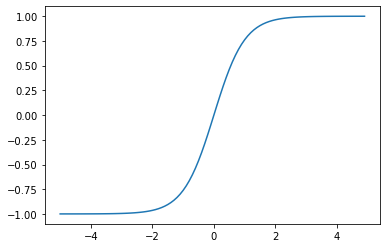

In [13]:
x = np.arange(-5.0, 5.0, 0.1)
y = np.tanh(x)

plt.plot(x, y)

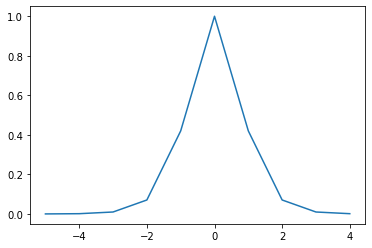

In [15]:
# tanh함수 미분
def derivative_tanh(x):
    return (1 + np.tanh(x)) * (1 - np.tanh(x))

x = np.arange(-5.0, 5.0, 1.0)
y = derivative_tanh(x)

plt.plot(x,y)

##### relu 
    - 0이하면 0이고, 0이상이면 해당 값을 가지는 함수

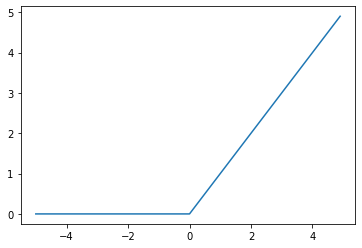

In [17]:
def relu_function(x):
    return np.maximum(0, x) #0,x사이 값 중 최댓값을 출력하는 maximum

x = np.arange(-5.0, 5.0, 0.1)
y = relu_function(x)

plt.plot(x,y)

#### 비용함수
    - 평균제곱오차(MSE), 교차 엔트로피(CEE)

##### 평균제곱오차(MSE)
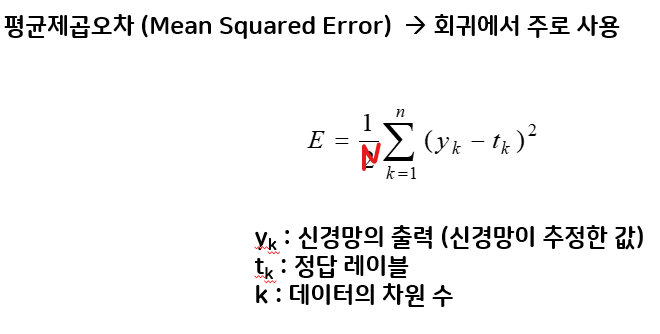

In [19]:
# 평균제곱오차 함수
def mse_function(y, pred, n):   #epochs
    return 1/n * np.sum((y - pred) ** 2)


# 잘 맞춘 경우
pred = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])     #one-hot encoding
y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])

print(mse_function(y, pred, y.size))                 ### 끝의 7은 버그..ㅎ 원랜 0나와야함

0.019500000000000007


In [22]:
# 못 맞춘 경우
pred = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])     #one-hot encoding
y = np.array([0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0])

print(mse_function(y, pred, y.size))

0.11950000000000001


오차가 늘어났다! (0.0195 -> 0.1195)

##### 교차 엔트로피(CEE)
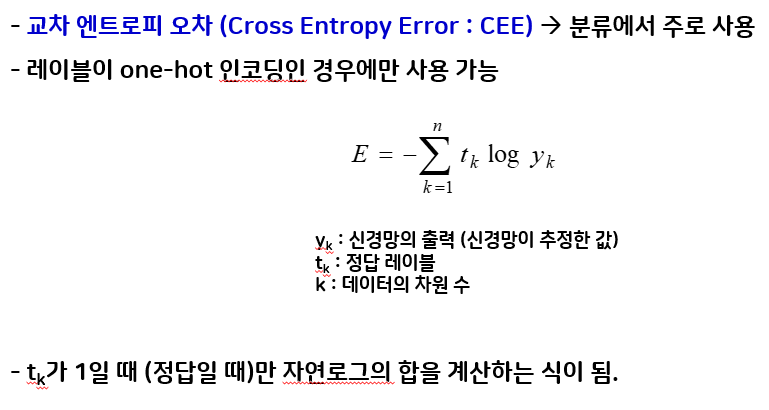

In [24]:
def cee_function(y, pred):
    delta = 1e-7       ##nan이 나오기때문에 써줬고, 거의 영향받지 않게끔 1e-7
    return -np.sum(y * np.log(pred + delta))


# 잘 맞춘 경우
pred = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])     #one-hot encoding
y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])

print(cee_function(y, pred))   


# 못 맞춘 경우
pred = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])     #one-hot encoding
y = np.array([0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0])

print(cee_function(y, pred))

6.447238200383332
14.50628607586249


못 맞출 때는 오차가 14로 올랐다!